In [1]:
import pandas as pd

df = pd.read_csv("schneider50k_clean.tsv",sep="\t")

# original_rxn: the mapped reaction SMILES (to be transformed for kernels)
# rxn_class: the classification class of the reaction (to be learned)

# Remove source
df.drop(columns=["source"], inplace=True)

print(df.head())
#print(df.iloc[46]["original_rxn"])

   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                        original_rxn rxn_class  \
0  [CH3:17][S:14](=[O:15])(=[O:16])[N:11]1[CH2:10...     6.1.5   
1  O.O.[Na+].[CH3:1][c:2]1[cH:7][c:6]([N+:8](=O)[...     7.1.1   
2  [CH3:1][O:2][c:3]1[cH:4][cH:5][c:6](-[c:9]2[cH...     1.8.5   
3  Cl.[CH3:43][CH2:42][S:44](=[O:45])(=[O:46])Cl....     2.2.3   
4  [CH3:25][O:24][c:21]1[cH:22][cH:23][c:17]([O:1...     1.3.7   

                                           clean_rxn  
0  [CH3:17][S:14](=[O:15])(=[O:16])[N:11]1[CH2:10...  
1  [CH3:1][c:2]1[cH:7][c:6]([N+:8](=O)[O-])[cH:5]...  
2  [CH3:1][O:2][c:3]1[cH:4][cH:5][c:6](-[c:9]2[cH...  
3  [CH3:43][CH2:42][S:44](=[O:45])(=[O:46])Cl.[CH...  
4  [CH3:25][O:24][c:21]1[cH:22][cH:23][c:17]([O:1...  


ITS graph
n: 2,d: {'element': 'C', 'aromatic': False, 'hcount': 3, 'charge': 0, 'neighbors': ['C'], 'atom_map': 2, 'typesGH': (('C', False, 3, 0, ['C']), ('C', False, 3, 0, ['C']))}
n: 1,d: {'element': 'C', 'aromatic': False, 'hcount': 2, 'charge': 0, 'neighbors': ['C', 'S'], 'atom_map': 1, 'typesGH': (('C', False, 2, 0, ['C', 'S']), ('C', False, 2, 0, ['C', 'S']))}
n: 3,d: {'element': 'S', 'aromatic': False, 'hcount': 0, 'charge': 0, 'neighbors': ['C', 'Cl', 'O', 'O'], 'atom_map': 3, 'typesGH': (('S', False, 0, 0, ['C', 'Cl', 'O', 'O']), ('S', False, 0, 0, ['C', 'N', 'O', 'O']))}
n: 4,d: {'element': 'O', 'aromatic': False, 'hcount': 0, 'charge': 0, 'neighbors': ['S'], 'atom_map': 4, 'typesGH': (('O', False, 0, 0, ['S']), ('O', False, 0, 0, ['S']))}
n: 5,d: {'element': 'O', 'aromatic': False, 'hcount': 0, 'charge': 0, 'neighbors': ['S'], 'atom_map': 5, 'typesGH': (('O', False, 0, 0, ['S']), ('O', False, 0, 0, ['S']))}
n: 7,d: {'element': 'C', 'aromatic': False, 'hcount': 3, 'charge': 0

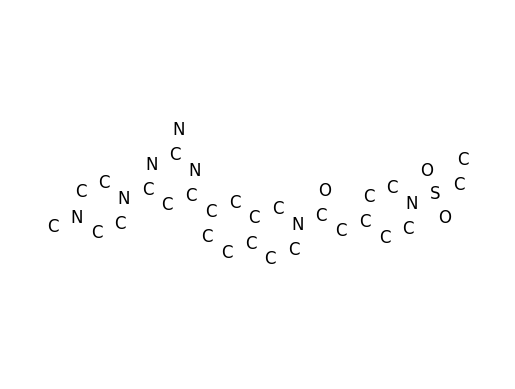

In [ ]:
# [O:22]=[C:14]([NH:13][CH2:12][CH2:11][NH:10][c:3]1[n:2][s:1][c:5]2[cH:6][cH:7][cH:8][cH:9][c:4]21)[c:15]1[cH:16][c:17](Cl)[cH:18][cH:19][n:20]1.[CH2:27]1[CH2:26][O:25][CH2:24][CH2:23][NH:28]1>>[O:22]=[C:14]([NH:13][CH2:12][CH2:11][NH:10][c:3]1[n:2][s:1][c:5]2[cH:6][cH:7][cH:8][cH:9][c:4]21)[c:15]1[cH:16][c:17]([N:28]2[CH2:27][CH2:26][O:25][CH2:24][CH2:23]2)[cH:18][cH:19][n:20]1

from scripts import plot_and_print_its_graphs
from networkx.algorithms import all_pairs_shortest_path, floyd_warshall
from synkit.IO import rsmi_to_graph

#plot_and_print_its_graphs(df.iloc[46]["original_rxn"])

educt, product = rsmi_to_graph(df.iloc[46]["original_rxn"])

# Transform educt to undirected graph
educt = educt.to_undirected()

paths = dict(floyd_warshall(educt))

# Print all shortest paths
for source_node, target_dict in paths.items():
    for target_node, path in target_dict.items():
        print(f"Shortest path from {source_node} to {target_node}: {path}")

# There exist equivalent paths but inversed, needs to be cleaned up



In [ ]:
# Categorize by rxn_class and count
class_counts = df['rxn_class'].value_counts()
print(class_counts)

In [ ]:
# Create varied sets containing 3-5 different classes and each 20-200 reactions
import random

def create_varied_set(classes:int, reactions_per_class:int) -> pd.DataFrame:
    selected_classes = random.sample(list(class_counts.index), classes)
    varied_set = pd.DataFrame()

    for cls in selected_classes:
        if not reactions_per_class:
            reactions_per_class = random.randint(20, 200)
        class_subset = df[df['rxn_class'] == cls].sample(n=reactions_per_class, random_state=42)
        varied_set = pd.concat([varied_set, class_subset])

    return varied_set.reset_index(drop=True)

print(create_varied_set(4, None))

ITS graph
n: 17,d: {'element': 'C', 'aromatic': False, 'hcount': 3, 'charge': 0, 'neighbors': ['S'], 'atom_map': 17, 'typesGH': (('C', False, 3, 0, ['S']), ('C', False, 3, 0, ['S']))}
n: 14,d: {'element': 'S', 'aromatic': False, 'hcount': 0, 'charge': 0, 'neighbors': ['C', 'N', 'O', 'O'], 'atom_map': 14, 'typesGH': (('S', False, 0, 0, ['C', 'N', 'O', 'O']), ('S', False, 0, 0, ['C', 'N', 'O', 'O']))}
n: 15,d: {'element': 'O', 'aromatic': False, 'hcount': 0, 'charge': 0, 'neighbors': ['S'], 'atom_map': 15, 'typesGH': (('O', False, 0, 0, ['S']), ('O', False, 0, 0, ['S']))}
n: 16,d: {'element': 'O', 'aromatic': False, 'hcount': 0, 'charge': 0, 'neighbors': ['S'], 'atom_map': 16, 'typesGH': (('O', False, 0, 0, ['S']), ('O', False, 0, 0, ['S']))}
n: 11,d: {'element': 'N', 'aromatic': False, 'hcount': 0, 'charge': 0, 'neighbors': ['C', 'C', 'S'], 'atom_map': 11, 'typesGH': (('N', False, 0, 0, ['C', 'C', 'S']), ('N', False, 0, 0, ['C', 'C', 'S']))}
n: 10,d: {'element': 'C', 'aromatic': False, 

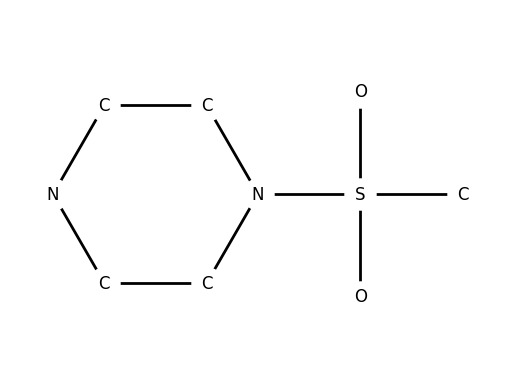

ITS graph
n: 1,d: {'element': 'C', 'aromatic': False, 'hcount': 3, 'charge': 0, 'neighbors': ['C'], 'atom_map': 1, 'typesGH': (('C', False, 3, 0, ['C']), ('C', False, 3, 0, ['C']))}
n: 2,d: {'element': 'C', 'aromatic': True, 'hcount': 0, 'charge': 0, 'neighbors': ['C', 'C', 'C'], 'atom_map': 2, 'typesGH': (('C', True, 0, 0, ['C', 'C', 'C']), ('C', True, 0, 0, ['C', 'C', 'C']))}
n: 7,d: {'element': 'C', 'aromatic': True, 'hcount': 1, 'charge': 0, 'neighbors': ['C', 'C'], 'atom_map': 7, 'typesGH': (('C', True, 1, 0, ['C', 'C']), ('C', True, 1, 0, ['C', 'C']))}
n: 6,d: {'element': 'C', 'aromatic': True, 'hcount': 0, 'charge': 0, 'neighbors': ['C', 'C', 'N'], 'atom_map': 6, 'typesGH': (('C', True, 0, 0, ['C', 'C', 'N']), ('C', True, 0, 0, ['C', 'C', 'N']))}
n: 8,d: {'element': 'N', 'aromatic': False, 'hcount': 0, 'charge': 1, 'neighbors': ['C', 'O', 'O'], 'atom_map': 8, 'typesGH': (('N', False, 0, 1, ['C', 'O', 'O']), ('N', False, 2, 0, ['C']))}
n: 5,d: {'element': 'C', 'aromatic': True, '

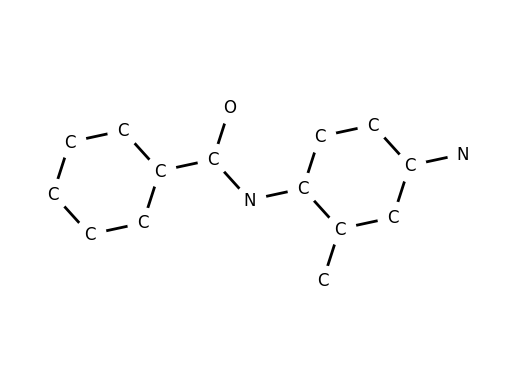

ITS graph
n: 1,d: {'element': 'C', 'aromatic': False, 'hcount': 3, 'charge': 0, 'neighbors': ['O'], 'atom_map': 1, 'typesGH': (('C', False, 3, 0, ['O']), ('C', False, 3, 0, ['O']))}
n: 2,d: {'element': 'O', 'aromatic': False, 'hcount': 0, 'charge': 0, 'neighbors': ['C', 'C'], 'atom_map': 2, 'typesGH': (('O', False, 0, 0, ['C', 'C']), ('O', False, 0, 0, ['C', 'C']))}
n: 3,d: {'element': 'C', 'aromatic': True, 'hcount': 0, 'charge': 0, 'neighbors': ['C', 'C', 'O'], 'atom_map': 3, 'typesGH': (('C', True, 0, 0, ['C', 'C', 'O']), ('C', True, 0, 0, ['C', 'C', 'O']))}
n: 4,d: {'element': 'C', 'aromatic': True, 'hcount': 1, 'charge': 0, 'neighbors': ['C', 'C'], 'atom_map': 4, 'typesGH': (('C', True, 1, 0, ['C', 'C']), ('C', True, 1, 0, ['C', 'C']))}
n: 5,d: {'element': 'C', 'aromatic': True, 'hcount': 1, 'charge': 0, 'neighbors': ['C', 'C'], 'atom_map': 5, 'typesGH': (('C', True, 1, 0, ['C', 'C']), ('C', True, 1, 0, ['C', 'C']))}
n: 6,d: {'element': 'C', 'aromatic': True, 'hcount': 0, 'charge'

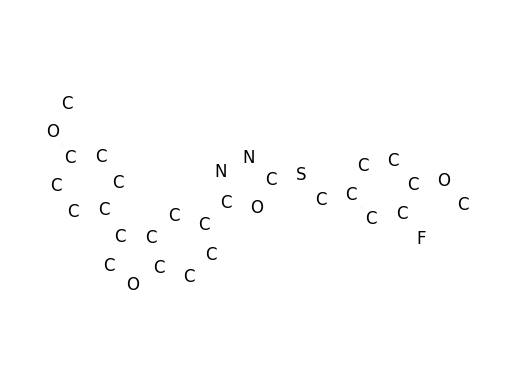

ITS graph
n: 43,d: {'element': 'C', 'aromatic': False, 'hcount': 3, 'charge': 0, 'neighbors': ['C'], 'atom_map': 43, 'typesGH': (('C', False, 3, 0, ['C']), ('C', False, 3, 0, ['C']))}
n: 42,d: {'element': 'C', 'aromatic': False, 'hcount': 2, 'charge': 0, 'neighbors': ['C', 'S'], 'atom_map': 42, 'typesGH': (('C', False, 2, 0, ['C', 'S']), ('C', False, 2, 0, ['C', 'S']))}
n: 44,d: {'element': 'S', 'aromatic': False, 'hcount': 0, 'charge': 0, 'neighbors': ['C', 'Cl', 'O', 'O'], 'atom_map': 44, 'typesGH': (('S', False, 0, 0, ['C', 'Cl', 'O', 'O']), ('S', False, 0, 0, ['C', 'N', 'O', 'O']))}
n: 45,d: {'element': 'O', 'aromatic': False, 'hcount': 0, 'charge': 0, 'neighbors': ['S'], 'atom_map': 45, 'typesGH': (('O', False, 0, 0, ['S']), ('O', False, 0, 0, ['S']))}
n: 46,d: {'element': 'O', 'aromatic': False, 'hcount': 0, 'charge': 0, 'neighbors': ['S'], 'atom_map': 46, 'typesGH': (('O', False, 0, 0, ['S']), ('O', False, 0, 0, ['S']))}
n: 39,d: {'element': 'C', 'aromatic': False, 'hcount': 3, 

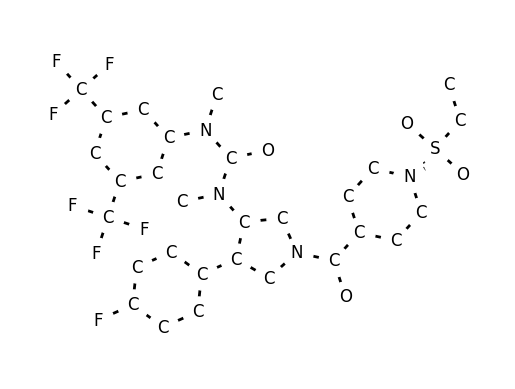

ITS graph
n: 25,d: {'element': 'C', 'aromatic': False, 'hcount': 3, 'charge': 0, 'neighbors': ['O'], 'atom_map': 25, 'typesGH': (('C', False, 3, 0, ['O']), ('C', False, 3, 0, ['O']))}
n: 24,d: {'element': 'O', 'aromatic': False, 'hcount': 0, 'charge': 0, 'neighbors': ['C', 'C'], 'atom_map': 24, 'typesGH': (('O', False, 0, 0, ['C', 'C']), ('O', False, 0, 0, ['C', 'C']))}
n: 21,d: {'element': 'C', 'aromatic': True, 'hcount': 0, 'charge': 0, 'neighbors': ['C', 'C', 'O'], 'atom_map': 21, 'typesGH': (('C', True, 0, 0, ['C', 'C', 'O']), ('C', True, 0, 0, ['C', 'C', 'O']))}
n: 22,d: {'element': 'C', 'aromatic': True, 'hcount': 1, 'charge': 0, 'neighbors': ['C', 'C'], 'atom_map': 22, 'typesGH': (('C', True, 1, 0, ['C', 'C']), ('C', True, 1, 0, ['C', 'C']))}
n: 23,d: {'element': 'C', 'aromatic': True, 'hcount': 1, 'charge': 0, 'neighbors': ['C', 'C'], 'atom_map': 23, 'typesGH': (('C', True, 1, 0, ['C', 'C']), ('C', True, 1, 0, ['C', 'C']))}
n: 17,d: {'element': 'C', 'aromatic': True, 'hcount': 

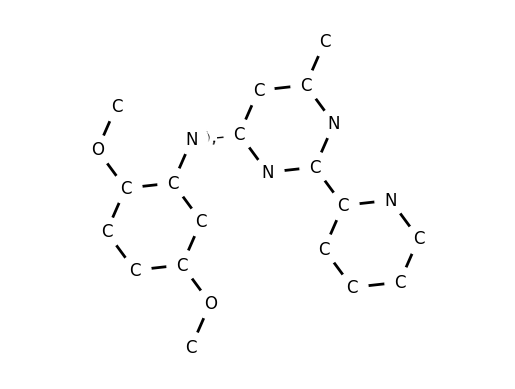

In [ ]:
from scripts import plot_and_print_its_graphs
from phi_transformation import phi_vertex

for i in range(5):
  try:
    reaction = df.iloc[i]["clean_rxn"]
    plot_and_print_its_graphs(reaction)
  except:
    None

In [ ]:
from scripts import plot_and_print_its_graphs
from phi_transformation import phi_vertex
from synkit.IO import rsmi_to_graph


for i in range(50):
  try:
    reaction = df.iloc[i]["clean_rxn"]
    educt_graph, product_graph = rsmi_to_graph(reaction)
    print(f"Educt graph: {phi_vertex(educt_graph)}")
    print(f"Product graph: {phi_vertex(product_graph)}")
  except:
    None

In [2]:
from phi_transformation import phi_shortest_path

t = phi_shortest_path("[CH3:17][S:14](=[O:15])(=[O:16])[N:11]1[CH2:10][CH2:9][N:8](Cc2ccccc2)[CH2:13][CH2:12]1>>[CH3:17][S:14](=[O:15])(=[O:16])[N:11]1[CH2:10][CH2:9][NH:8][CH2:13][CH2:12]1")

print(t)

{17: {17: [17], 14: [17, 14], 15: [17, 14, 15], 16: [17, 14, 16], 11: [17, 14, 11], 10: [17, 14, 11, 10], 12: [17, 14, 11, 12], 9: [17, 14, 11, 10, 9], 13: [17, 14, 11, 12, 13], 8: [17, 14, 11, 10, 9, 8]}, 14: {14: [14], 17: [14, 17], 15: [14, 15], 16: [14, 16], 11: [14, 11], 10: [14, 11, 10], 12: [14, 11, 12], 9: [14, 11, 10, 9], 13: [14, 11, 12, 13], 8: [14, 11, 10, 9, 8]}, 15: {15: [15], 14: [15, 14], 17: [15, 14, 17], 16: [15, 14, 16], 11: [15, 14, 11], 10: [15, 14, 11, 10], 12: [15, 14, 11, 12], 9: [15, 14, 11, 10, 9], 13: [15, 14, 11, 12, 13], 8: [15, 14, 11, 10, 9, 8]}, 16: {16: [16], 14: [16, 14], 17: [16, 14, 17], 15: [16, 14, 15], 11: [16, 14, 11], 10: [16, 14, 11, 10], 12: [16, 14, 11, 12], 9: [16, 14, 11, 10, 9], 13: [16, 14, 11, 12, 13], 8: [16, 14, 11, 10, 9, 8]}, 11: {11: [11], 14: [11, 14], 10: [11, 10], 12: [11, 12], 17: [11, 14, 17], 15: [11, 14, 15], 16: [11, 14, 16], 9: [11, 10, 9], 13: [11, 12, 13], 8: [11, 10, 9, 8]}, 10: {10: [10], 11: [10, 11], 9: [10, 9], 14: [

In [15]:
from networkx.algorithms import all_pairs_shortest_path
from synkit.IO import rsmi_to_graph

graph, _ = rsmi_to_graph("[CH3:17][S:14](=[O:15])(=[O:16])[N:11]1[CH2:10][CH2:9][N:8](Cc2ccccc2)[CH2:13][CH2:12]1>>[CH3:17][S:14](=[O:15])(=[O:16])[N:11]1[CH2:10][CH2:9][NH:8][CH2:13][CH2:12]1")

for n, d in graph.nodes(data=True):
  # Store mapping of node to label
  node_to_label = {n: d["element"] for n, d in graph.nodes(data=True)}
  
print(node_to_label)

paths = dict(all_pairs_shortest_path(graph))

# For each path, convert to string representation
for source, target_dict in paths.items():
  for target, path in target_dict.items():
    # Print path
    print(f"Path from {source} to {target}: {' -> '.join(map(str, path))}")
    # Convert the path to label concatenation using node_to_label
    label_path = ''.join(node_to_label[n] for n in path)
    print(f"Label path: {label_path}")

{17: 'C', 14: 'S', 15: 'O', 16: 'O', 11: 'N', 10: 'C', 9: 'C', 8: 'N', 13: 'C', 12: 'C'}
Path from 17 to 17: 17
Label path: C
Path from 17 to 14: 17 -> 14
Label path: CS
Path from 17 to 15: 17 -> 14 -> 15
Label path: CSO
Path from 17 to 16: 17 -> 14 -> 16
Label path: CSO
Path from 17 to 11: 17 -> 14 -> 11
Label path: CSN
Path from 17 to 10: 17 -> 14 -> 11 -> 10
Label path: CSNC
Path from 17 to 12: 17 -> 14 -> 11 -> 12
Label path: CSNC
Path from 17 to 9: 17 -> 14 -> 11 -> 10 -> 9
Label path: CSNCC
Path from 17 to 13: 17 -> 14 -> 11 -> 12 -> 13
Label path: CSNCC
Path from 17 to 8: 17 -> 14 -> 11 -> 10 -> 9 -> 8
Label path: CSNCCN
Path from 14 to 14: 14
Label path: S
Path from 14 to 17: 14 -> 17
Label path: SC
Path from 14 to 15: 14 -> 15
Label path: SO
Path from 14 to 16: 14 -> 16
Label path: SO
Path from 14 to 11: 14 -> 11
Label path: SN
Path from 14 to 10: 14 -> 11 -> 10
Label path: SNC
Path from 14 to 12: 14 -> 11 -> 12
Label path: SNC
Path from 14 to 9: 14 -> 11 -> 10 -> 9
Label path

In [16]:
# Read schneider_50k_clean.tsv, extract the clean_rxn column and write every reaction to a separate line in reactions.txt
with open("reactions.txt", "w") as f:
    for i in range(len(df)):
        reaction = df.iloc[i]["clean_rxn"]
        f.write(reaction + "\n")